In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.stats
import matplotlib.font_manager as font_manager
from matplotlib import cm
from matplotlib.path import Path
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap, maskoceans
import shapefile

(365, 1, 38, 277, 349)
(277, 349)
34.1741365132


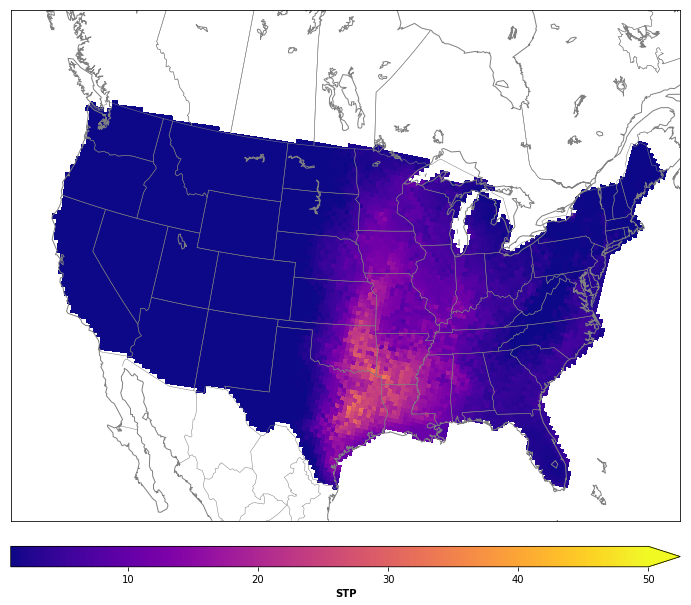

In [2]:
nc1 = Dataset('narr_latlon.nc','r',format='NETCDF4_CLASSIC')
lats = nc1.variables["lats"][0][:][:]
lons = nc1.variables["lons"][0][:][:]
nc1.close()
stp_00z=np.load('/home/data/stp_narr/stp_00z.npy')
#stp_03z=np.load('stp_03z_narr.npy')
#stp_06z=np.load('stp_06z_narr.npy')
#stp_09z=np.load('stp_09z_narr.npy')
#stp_12z=np.load('stp_12z_narr.npy')
#stp_15z=np.load('stp_15z_narr.npy')
#stp_18z=np.load('stp_18z_narr.npy')
#stp_21z=np.load('stp_21z_narr.npy')

print (stp_00z.shape)
#stp_all_hrs=np.sum(np.squeeze(np.stack((stp_00z,stp_03z,stp_06z,stp_09z,stp_12z,stp_15z,stp_18z,stp_21z)),axis=2),axis=0)
#print(stp_all_hrs.shape)

stp_00z=np.sum(stp_00z,axis=0)
stp_00z=np.max(stp_00z,axis=0)
stp_00z=np.average(stp_00z,axis=0)
print (stp_00z.shape)


#read shapefile using pyshp (http://code.google.com/p/pyshp/)
sf = shapefile.Reader('/home/vgensini/projects/enso/shapefiles/US_outline.shp')
sfrec = sf.shapeRecord()
points = sfrec.shape.points
#print points
latty_bin = lats.flatten()
lonny_bin = lons.flatten()
lonlat = []

for lt,ln in zip(latty_bin,lonny_bin):
  lonlat.append([ln,lt])
#use points_inside_polygon to 
#clip = matplotlib.nxutils.points_inside_poly(lonlat,points)
path = Path(points)
clip = path.contains_points(lonlat)

#reshape array
clip = clip.reshape(lats.shape)
stp_clip = np.ma.masked_where(clip==False,stp_00z)
print (stp_clip.max())
fig = plt.figure()
fig.set_size_inches(12,12)
m = Basemap  (projection='lcc',lon_0=-92.54199,lat_0=38.09401,llcrnrlat=20, urcrnrlat=55,llcrnrlon=-120,urcrnrlon=-60,resolution='l',area_thresh=1000)
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
#masked = maskoceans(lons,lats,stp_avg_yr)
m.drawcountries(color='gray')
x,y = m(lons,lats)
#plot = m.pcolormesh(x,y,masked,zorder=1, norm=colors.LogNorm(vmin=1, vmax=50),cmap=cm.magma)
plot = m.pcolormesh(x,y,stp_clip,zorder=1,vmin=1, vmax=50,cmap=cm.plasma)
colbar = m.colorbar(plot,"bottom", size="4%",pad="5%",extend='max')
colbar.set_label('STP',fontsize='medium',weight='bold')
plt.title =("1979-2016 STP > 1")
plt.show()